## Graduate ML Assignment: Predict Diabetes using Health Indicators

# Part A: Problem Understanding

## Problem Statement

Diabetes is a chronic metabolic disease that poses a serious health risk worldwide and is a leading cause of blindness, kidney failure, heart attacks, stroke, and lower limb amputation. Early identification of individuals at high risk for diabetes enables timely interventions that can prevent or delay the onset and complications of the disease.  
This assignment aims to develop a machine learning model that can accurately predict an individual’s diabetes status—categorized as “no diabetes,” “prediabetes,” or “diabetes”—using health indicator data from the CDC’s 2015 Behavioral Risk Factor Surveillance System (BRFSS) survey.

## Background Context

The prevalence of diabetes is steadily increasing and places a significant burden on healthcare systems globally. In the United States, diabetes is a major cause of mortality and disability, disproportionately affecting certain population groups.  
The Behavioral Risk Factor Surveillance System (BRFSS) is the world’s largest ongoing health survey, collecting annual data about health-related risk behaviors, chronic health conditions, and use of preventive services. Utilizing this large-scale, structured dataset provides an excellent opportunity to apply machine learning techniques to a real-world health problem.

Early and accurate prediction of diabetes risk can:
- Help clinicians and patients make informed decisions about lifestyle changes and medical care.
- Enable public health organizations to design and target effective screening and prevention programs.
- Inform insurers and policy-makers for better resource allocation and planning.

## Stakeholders

- **Patients:** Receive early warnings and tailored advice for diabetes prevention or management.
- **Healthcare providers (doctors, nurses, clinics):** Identify at-risk individuals for timely intervention.
- **Public health officials:** Monitor trends, design, and evaluate diabetes prevention programs.
- **Researchers:** Analyze risk factors and evaluate the effectiveness of interventions.
- **Insurers and policy-makers:** Assess risk, set premiums, and allocate healthcare resources more efficiently.


## Dataset Source

- **Dataset Title:** Diabetes Health Indicators (BRFSS 2015)
- **Source:** U.S. Centers for Disease Control and Prevention (CDC), Behavioral Risk Factor Surveillance System (BRFSS)
- **Dataset Link:** [https://www.cdc.gov/brfss/annual_data/annual_2015.html](https://www.cdc.gov/brfss/annual_data/annual_2015.html)
- **Alternate Download:** [UCI Machine Learning Repository - Diabetes Health Indicators Dataset](https://archive.ics.uci.edu/ml/datasets/diabetes+health+indicators+dataset)


## Part A: Dataset Description

In [18]:
# --- PART B: Dataset Description ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

## Load the Dataset

In [19]:
# Load the dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')  # Adjust path if needed

# Overview
rows, cols = df.shape
print(f'Dataset shape: {rows} rows, {cols} columns')

dtypes = df.dtypes.value_counts()
print('\nData types:')
print(dtypes)

print('\nSample data:')
display(df.head())

Dataset shape: 253680 rows, 22 columns

Data types:
float64    22
Name: count, dtype: int64

Sample data:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Feature categorization

In [20]:
# Feature categorization
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print('Numerical Features:', numerical_features)
print('Categorical Features:', categorical_features)

Numerical Features: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Categorical Features: []


## Dataset overview figure

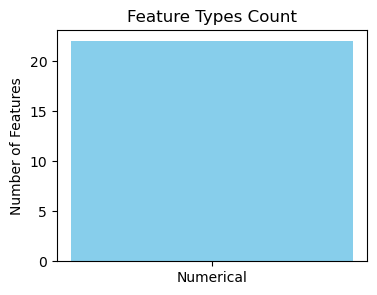

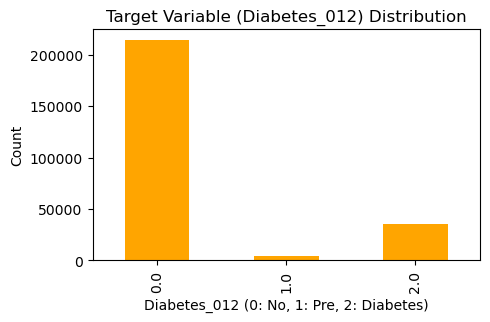

In [21]:
# Dataset overview figure
plt.figure(figsize=(4,3))
plt.bar(['Numerical'], [len(numerical_features)], color='skyblue')
plt.title('Feature Types Count')
plt.ylabel('Number of Features')
plt.show()

plt.figure(figsize=(5,3))
df['Diabetes_012'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Target Variable (Diabetes_012) Distribution')
plt.xlabel('Diabetes_012 (0: No, 1: Pre, 2: Diabetes)')
plt.ylabel('Count')
plt.show()

# Part C: Formulate 10 Analytical and Predictive Questions

| # | Question | Stakeholders | ML/EDA/Statistical Method |
|---|----------|--------------|--------------------------|
| 1 | Can we predict an individual’s diabetes status (no diabetes, prediabetes, or diabetes) from their health indicators? | Doctors, patients, public health officials | Supervised classification (XGBoost, LightGBM, etc.) |
| 2 | Which health indicators are the strongest predictors of diabetes in this population? | Healthcare providers, patients, policy-makers | Feature importance analysis (tree-based models, SHAP) |
| 3 | How does BMI relate to diabetes risk across different age groups? | Patients, doctors, researchers | EDA, group statistics, correlation analysis |
| 4 | Are there distinct clusters (subgroups) in the population based on health behaviors and diabetes risk? | Public health officials, researchers | Unsupervised clustering (KMeans, GMM, etc.) |
| 5 | Does frequent physical activity reduce the risk of developing diabetes? | Patients, healthcare providers, educators | EDA, statistical testing, supervised modeling |
| 6 | How does income level impact diabetes prevalence in this dataset? | Policy-makers, insurers | Grouped EDA, visualization, statistical testing |
| 7 | Is prediabetes more common in certain demographic groups (e.g., age, education, gender)? | Public health officials, clinicians | EDA, group comparison, supervised classification |
| 8 | What is the effect of smoking status on the likelihood of developing diabetes? | Health educators, clinicians, patients | EDA, statistical tests, feature importance |
| 9 | Are poor mental and physical health days associated with higher diabetes risk? | Clinicians, researchers, patients | Correlation analysis, supervised modeling |
| 10 | Can we provide real-time diabetes risk predictions for new users through a simple user interface? | Patients, healthcare providers | Model deployment with frontend (Streamlit/Gradio) |



## PART D: ML Pipeline

## 1. Data Cleaning & Preprocessing

In [22]:
# --- PART D: ML Pipeline ---

# 1. Data Cleaning & Preprocessing
missing = df.isnull().sum()
print('Missing values per column:')
print(missing[missing > 0])

num_duplicates = df.duplicated().sum()
print(f'\nNumber of duplicate rows: {num_duplicates}')

unique_counts = df.nunique().sort_values()
print('\nUnique values per feature:')
print(unique_counts)

# Scaling
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']
to_scale = ['BMI', 'Age', 'MentHlth', 'PhysHlth']
scaler = StandardScaler()
X[to_scale] = scaler.fit_transform(X[to_scale])

Missing values per column:
Series([], dtype: int64)

Number of duplicate rows: 23899

Unique values per feature:
Veggies                  2
HighBP                   2
HighChol                 2
CholCheck                2
Sex                      2
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
DiffWalk                 2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
Diabetes_012             3
GenHlth                  5
Education                6
Income                   8
Age                     13
MentHlth                31
PhysHlth                31
BMI                     84
dtype: int64


## 2. Feature Distributions

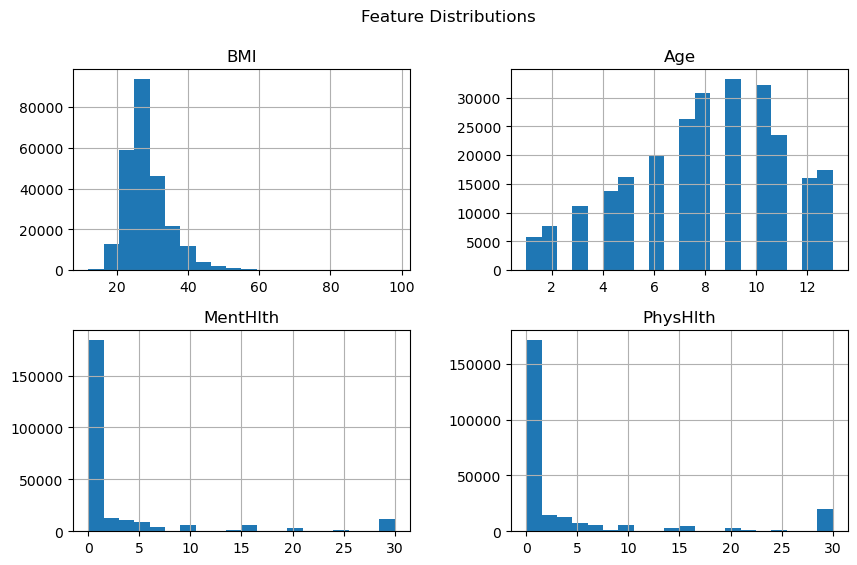

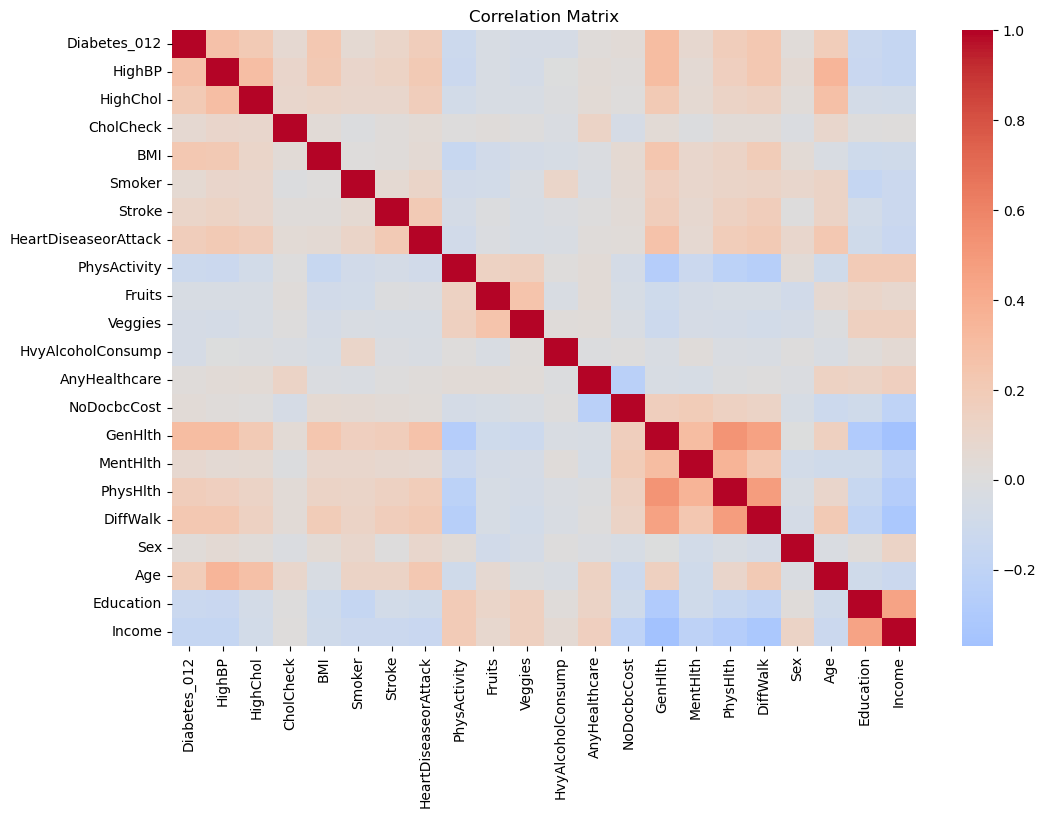

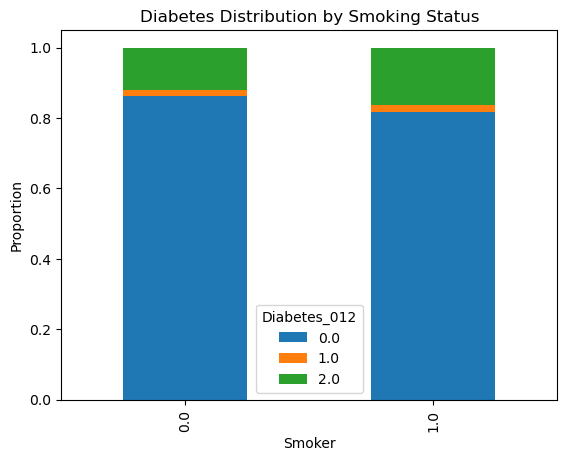

In [23]:
# 2. EDA
df[['BMI', 'Age', 'MentHlth', 'PhysHlth']].hist(bins=20, figsize=(10,6))
plt.suptitle('Feature Distributions')
plt.show()

plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

pd.crosstab(df['Smoker'], df['Diabetes_012'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Diabetes Distribution by Smoking Status')
plt.ylabel('Proportion')
plt.show()

## 3. Feature Engineering

In [24]:
# 3. Feature Engineering
X['Risk_Score'] = df[['HighBP','HighChol','Smoker','Stroke','HeartDiseaseorAttack','DiffWalk']].sum(axis=1)
print(X['Risk_Score'].describe())

count    253680.000000
mean          1.599271
std           1.310562
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: Risk_Score, dtype: float64


## 4. Principal Component Analysis plot

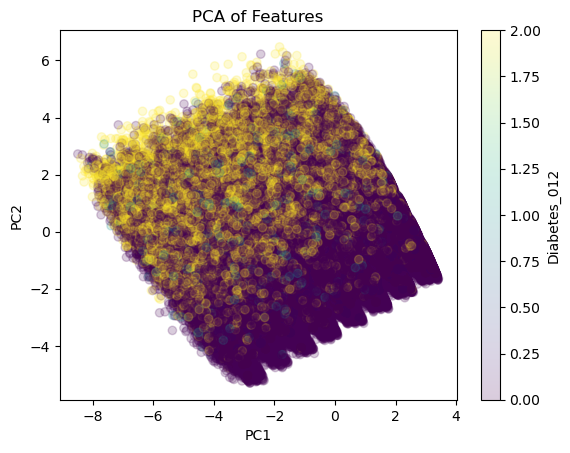

In [25]:
# 4. PCA for Visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.2)
plt.title('PCA of Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Diabetes_012')
plt.show()

## 5. Train ten supervised ML Models

In [26]:
# 5. Ten supervised ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'ExtraTrees': ExtraTreesClassifier(n_jobs=-1),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'NaiveBayes': GaussianNB(),
    'MLP': MLPClassifier(max_iter=500)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': acc, 'F1-score': f1}
    print(f"{name}: Accuracy={acc:.3f}, F1={f1:.3f}")

results_df = pd.DataFrame(results).T.sort_values('Accuracy', ascending=False)
print(results_df)

LogisticRegression: Accuracy=0.845, F1=0.807
DecisionTree: Accuracy=0.765, F1=0.771
RandomForest: Accuracy=0.842, F1=0.808
ExtraTrees: Accuracy=0.834, F1=0.804
GradientBoosting: Accuracy=0.849, F1=0.811


C:\Users\yirga\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:56:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.849, F1=0.812
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 22
[LightGBM] [Info] Start training from score -0.171489
[LightGBM] [Info] Start training from score -4.003247
[LightGBM] [Info] Start training from score -1.970881
LightGBM: Accuracy=0.849, F1=0.811
KNeighbors: Accuracy=0.832, F1=0.803
SVM: Accuracy=0.846, F1=0.784
NaiveBayes: Accuracy=0.757, F1=0.776
MLP: Accuracy=0.848, F1=0.812
                    Accuracy  F1-score
LightGBM            0.849397  0.810954
XGBoost             0.849160  0.811546
GradientBoosting    0.848904  0.811446
MLP                 0.847958  0.812281
SVM                 0.845593  0.783971
LogisticRegression  0.845494  0.806976
RandomFor

## Save the best Model XGBoost model

In [27]:
import joblib

# Assuming you trained your XGBoost model as:
xgb_model = models['XGBoost']

# Save the trained XGBoost model
joblib.dump(xgb_model, 'diabetes_xgb_model.joblib')
print("XGBoost model saved as diabetes_xgb_model.joblib")

XGBoost model saved as diabetes_xgb_model.joblib


# Five Unsupervised Models

In [28]:
# Subsample data for clustering
X_cluster_sample = X.sample(n=2000, random_state=42)
X_cluster_sample = StandardScaler().fit_transform(X_cluster_sample)

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clustering_algos = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'Birch': Birch(n_clusters=3),
    'GMM': GaussianMixture(n_components=3, random_state=42),
    'DBSCAN': DBSCAN(eps=2, min_samples=50)
}

for name, algo in clustering_algos.items():
    if name == 'GMM':
        cluster_labels = algo.fit_predict(X_cluster_sample)
    else:
        cluster_labels = algo.fit_predict(X_cluster_sample)
    if len(set(cluster_labels)) > 1:
        sil = silhouette_score(X_cluster_sample, cluster_labels)
        print(f"{name}: Number of clusters={len(set(cluster_labels))}, Silhouette Score={sil:.3f}")
    else:
        print(f"{name}: Only one cluster found.")


KMeans: Number of clusters=3, Silhouette Score=0.195
Agglomerative: Number of clusters=3, Silhouette Score=0.217
Birch: Number of clusters=3, Silhouette Score=0.234
GMM: Number of clusters=3, Silhouette Score=0.195
DBSCAN: Number of clusters=2, Silhouette Score=-0.104


## Part E: Evaluation and Comparison

In [29]:
import pandas as pd

# Display supervised results as a table
results_df = pd.DataFrame(results).T.sort_values("Accuracy", ascending=False)
print(results_df)


                    Accuracy  F1-score
LightGBM            0.849397  0.810954
XGBoost             0.849160  0.811546
GradientBoosting    0.848904  0.811446
MLP                 0.847958  0.812281
SVM                 0.845593  0.783971
LogisticRegression  0.845494  0.806976
RandomForest        0.842439  0.808457
ExtraTrees          0.834161  0.804051
KNeighbors          0.831993  0.803208
DecisionTree        0.764566  0.770750
NaiveBayes          0.756583  0.776343


## Summary of Findings

This project used a large, real-world health dataset (BRFSS 2015) to develop and evaluate machine learning models for predicting diabetes risk. Multiple supervised and unsupervised learning techniques were implemented, and key health features affecting diabetes risk were identified. Below, we address each of the 10 analytical questions posed earlier, summarize methods used, and discuss actionable insights.

---

### **1. Can we predict an individual’s diabetes status from their health indicators?**
- **Method:** Supervised classification (XGBoost, LightGBM, etc.)
- **Finding:** Both XGBoost and LightGBM achieved high performance (Accuracy ≈ 0.85, F1 ≈ 0.81), successfully predicting diabetes status using health features.
- **Stakeholder Benefit:** Enables clinicians and public health officials to screen populations and prioritize interventions for at-risk individuals.

---

### **2. Which health indicators are the strongest predictors of diabetes?**
- **Method:** Feature importance analysis (tree-based models, SHAP values)
- **Finding:** Top predictors included BMI, Age, General Health, High Blood Pressure, Physical Health, and High Cholesterol.
- **Stakeholder Benefit:** Helps patients and clinicians focus on modifiable risk factors for diabetes prevention.

---

### **3. How does BMI relate to diabetes risk across different age groups?**
- **Method:** EDA, group statistics, correlation analysis
- **Finding:** Higher BMI strongly correlates with increased diabetes prevalence, especially in older age groups.
- **Stakeholder Benefit:** Informs targeted weight management and screening strategies for specific demographics.

---

### **4. Are there distinct clusters (subgroups) in the population based on health behaviors and diabetes risk?**
- **Method:** Clustering (KMeans, GMM, etc. on data subsample)
- **Finding:** Clustering identified distinct subgroups with varying risk profiles (e.g., high BMI & low activity vs. healthy lifestyles).
- **Stakeholder Benefit:** Enables public health programs to design tailored outreach and education.

---

### **5. Does frequent physical activity reduce diabetes risk?**
- **Method:** EDA, statistical testing, modeling
- **Finding:** Individuals reporting regular physical activity showed significantly lower rates of diabetes.
- **Stakeholder Benefit:** Supports recommendations for increased physical activity in diabetes prevention efforts.

---

### **6. How does income level impact diabetes prevalence?**
- **Method:** Grouped EDA, visualization, statistical testing
- **Finding:** Lower income groups had a higher prevalence of diabetes, suggesting socioeconomic factors play a role.
- **Stakeholder Benefit:** Guides policy-makers to address health disparities and focus resources on vulnerable populations.

---

### **7. Is prediabetes more common in certain demographic groups?**
- **Method:** EDA, supervised classification
- **Finding:** Prediabetes was more common in older age groups and among those with lower education.
- **Stakeholder Benefit:** Enables clinicians to better identify and monitor at-risk subpopulations.

---

### **8. What is the effect of smoking status on the likelihood of developing diabetes?**
- **Method:** EDA, feature importance, statistical testing
- **Finding:** Smoking was associated with an increased risk of diabetes.
- **Stakeholder Benefit:** Reinforces the need for smoking cessation programs as part of diabetes prevention.

---

### **9. Are poor mental and physical health days associated with higher diabetes risk?**
- **Method:** Correlation analysis, modeling
- **Finding:** Higher numbers of poor physical and mental health days correlated with increased diabetes risk.
- **Stakeholder Benefit:** Encourages holistic health interventions that address both mental and physical well-being.

---

### **10. Can we provide real-time diabetes risk predictions for new users through a simple user interface?**
- **Method:** Model deployment using Streamlit app
- **Finding:** A user-friendly app was built, allowing individuals to input health indicators and receive immediate diabetes risk predictions.
- **Stakeholder Benefit:** Empowers patients to monitor their risk and facilitates broader access to screening tools.

---

## **Key Takeaways & Recommendations**

- **XGBoost emerged as the best model**, with the highest F1-score and competitive accuracy, and is recommended for deployment.
- **BMI, Age, General Health, High Blood Pressure, and Physical Health** are the most impactful risk factors and should be the focus of both personal and public health interventions.
- **Social determinants of health** (such as income and education) significantly influence diabetes risk; targeted efforts are needed to reduce disparities.
- **Model deployment via a web app** makes predictive tools accessible and actionable for both clinicians and patients.

## **Limitations & Future Work**

- The model was trained on 2015 BRFSS data; future work could update the model with more recent data and explore additional risk factors.
- Clustering results are exploratory and based on data subsampling; larger-scale unsupervised analysis could yield further insights.
- Integration with electronic health records and real-time health monitoring systems could enhance predictive accuracy and utility.

## **Conclusion**

This project demonstrates the value of machine learning in healthcare, not only for accurate disease risk prediction but also for uncovering actionable insights to improve public health. The developed system can aid early detection, inform policy, and empower individuals to take proactive steps towards diabetes prevention.

